In [1]:
import pandas as pd
from ast import literal_eval

In [2]:
movies_metadata = pd.read_csv("data/movies_metadata.csv")
links_small = pd.read_csv("data/links_small.csv")
movies_keywords = pd.read_csv("data/keywords.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12704\2417491277.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("data/movies_metadata.csv")


In [51]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
links_small.shape
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
movies_metadata = movies_metadata[movies_metadata['id'].isin(links_small.astype('str'))]

In [5]:
movies_metadata.head()
# ['id','title','genres','popularity','release_date']

movies = movies_metadata[['id','title','genres','popularity','release_date']]

In [6]:
movies

,id,title,genres,popularity,release_date
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10
...,...,...,...,...,...
40224,315011,Shin Godzilla,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9.285519,2016-07-29
40503,391698,The Beatles: Eight Days a Week - The Touring Y...,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",7.078301,2016-09-15
44821,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.480376,2000-07-08
44826,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.080108,2001-07-06


In [7]:
movies_keywords.shape
movies_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# movies['id']
# movies_keywords['id'] = movies_keywords['id'].astype('str')
# movies_keywords['id']

movies = movies.merge(movies_keywords,on=['id'])


In [12]:
movies.head()

,id,title,genres,popularity,release_date,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [13]:
movies['genres'] = movies['genres'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])



In [14]:
movies['genres']

0                             [Animation, Comedy, Family]
1                            [Adventure, Family, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9146      [Action, Adventure, Animation, Family, Fantasy]
9147    [Adventure, Animation, Family, Fantasy, Scienc...
9148    [Adventure, Animation, Family, Fantasy, Scienc...
9149                                      [Comedy, Drama]
9150                                      [Comedy, Drama]
Name: genres, Length: 9151, dtype: object

In [15]:
movies['keywords'] = movies['keywords'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])
movies['keywords']

0       [boy, boy next door, friends, friendship, jeal...
1       [based on children's book, board game, disappe...
2       [best friend, duringcreditsstinger, fishing, o...
3       [based on novel, chick flick, divorce, interra...
4       [aging, baby, confidence, contraception, daugh...
                              ...                        
9146    [anime, based on tv series, based on video gam...
9147                            [celebi, pokémon, sequel]
9148                            [celebi, pokémon, sequel]
9149    [avalanche, dark comedy, family vacation, fema...
9150    [avalanche, dark comedy, family vacation, fema...
Name: keywords, Length: 9151, dtype: object

In [16]:
movies['str_genres_keywords'] = movies['genres'] + movies['keywords'] 

In [17]:
movies[['genres','keywords','str_genres_keywords']]

,genres,keywords,str_genres_keywords
0,"[Animation, Comedy, Family]","[boy, boy next door, friends, friendship, jeal...","[Animation, Comedy, Family, boy, boy next door..."
1,"[Adventure, Family, Fantasy]","[based on children's book, board game, disappe...","[Adventure, Family, Fantasy, based on children..."
2,"[Comedy, Romance]","[best friend, duringcreditsstinger, fishing, o...","[Comedy, Romance, best friend, duringcreditsst..."
3,"[Comedy, Drama, Romance]","[based on novel, chick flick, divorce, interra...","[Comedy, Drama, Romance, based on novel, chick..."
4,[Comedy],"[aging, baby, confidence, contraception, daugh...","[Comedy, aging, baby, confidence, contraceptio..."
...,...,...,...
9146,"[Action, Adventure, Animation, Family, Fantasy]","[anime, based on tv series, based on video gam...","[Action, Adventure, Animation, Family, Fantasy..."
9147,"[Adventure, Animation, Family, Fantasy, Scienc...","[celebi, pokémon, sequel]","[Adventure, Animation, Family, Fantasy, Scienc..."
9148,"[Adventure, Animation, Family, Fantasy, Scienc...","[celebi, pokémon, sequel]","[Adventure, Animation, Family, Fantasy, Scienc..."
9149,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."


In [18]:
movies['str_genres_keywords'] = movies['str_genres_keywords'] \
                            .apply(lambda x: sorted(list(x))) \
                            .apply(lambda x: " ".join(x) if len(x) > 0 else None)

In [19]:
movies[['str_genres_keywords']].iloc[0].values[0]

'Animation Comedy Family boy boy next door friends friendship jealousy new toy rivalry toy toy comes to life'

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   9151 non-null   object
 1   title                9151 non-null   object
 2   genres               9151 non-null   object
 3   popularity           9151 non-null   object
 4   release_date         9151 non-null   object
 5   keywords             9151 non-null   object
 6   str_genres_keywords  9124 non-null   object
dtypes: object(7)
memory usage: 500.6+ KB


In [21]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9151 non-null   object        
 1   title                9151 non-null   object        
 2   genres               9151 non-null   object        
 3   popularity           9151 non-null   object        
 4   release_date         9151 non-null   datetime64[ns]
 5   keywords             9151 non-null   object        
 6   str_genres_keywords  9124 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 500.6+ KB


In [23]:
movies['year'] = movies['release_date'].dt.year

In [24]:
movies

,id,title,genres,popularity,release_date,keywords,str_genres_keywords,year
0,862,Toy Story,"[Animation, Comedy, Family]",21.946943,1995-10-30,"[boy, boy next door, friends, friendship, jeal...",Animation Comedy Family boy boy next door frie...,1995
1,8844,Jumanji,"[Adventure, Family, Fantasy]",17.015539,1995-12-15,"[based on children's book, board game, disappe...",Adventure Family Fantasy based on children's b...,1995
2,15602,Grumpier Old Men,"[Comedy, Romance]",11.7129,1995-12-22,"[best friend, duringcreditsstinger, fishing, o...",Comedy Romance best friend duringcreditsstinge...,1995
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",3.859495,1995-12-22,"[based on novel, chick flick, divorce, interra...",Comedy Drama Romance based on novel chick flic...,1995
4,11862,Father of the Bride Part II,[Comedy],8.387519,1995-02-10,"[aging, baby, confidence, contraception, daugh...",Comedy aging baby confidence contraception dau...,1995
...,...,...,...,...,...,...,...,...
9146,10991,Pokémon: Spell of the Unknown,"[Action, Adventure, Animation, Family, Fantasy]",6.480376,2000-07-08,"[anime, based on tv series, based on video gam...",Action Adventure Animation Family Fantasy anim...,2000
9147,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[Adventure, Animation, Family, Fantasy, Scienc...",6.080108,2001-07-06,"[celebi, pokémon, sequel]",Adventure Animation Family Fantasy Science Fic...,2001
9148,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[Adventure, Animation, Family, Fantasy, Scienc...",6.080108,2001-07-06,"[celebi, pokémon, sequel]",Adventure Animation Family Fantasy Science Fic...,2001
9149,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...,2014


In [25]:
# movies['popularity'].info()
movies['popularity'] = movies['popularity'].astype(float)

In [26]:
movies['popularity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9151 entries, 0 to 9150
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
9151 non-null   float64
dtypes: float64(1)
memory usage: 71.6 KB


In [27]:
movies['popularity'].describe()

count    9151.000000
mean        7.259378
std         9.353553
min         0.000004
25%         2.936654
50%         6.411782
75%         9.855113
max       547.488298
Name: popularity, dtype: float64

<Axes: xlabel='popularity', ylabel='Count'>

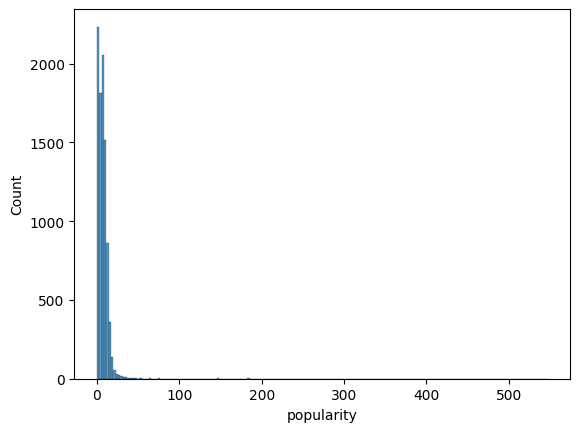

In [28]:
import seaborn as sns
sns.histplot(movies['popularity'])


In [30]:
import numpy as np
movies['popularity_log'] = np.log(movies['popularity'])
movies[['popularity','popularity_log']].describe()

,popularity,popularity_log
count,9151.000000,9151.000000
mean,7.259378,1.559346
std,9.353553,1.159141
min,0.000004,-12.429216
25%,2.936654,1.077271
50%,6.411782,1.858137
75%,9.855113,2.287990
max,547.488298,6.305341


<Axes: xlabel='popularity_log', ylabel='Count'>

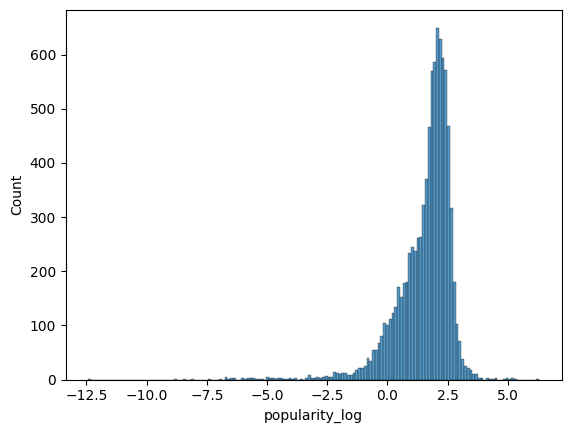

In [ ]:
sns.histplot(movies['popularity_log'])

In [31]:
movies.isnull().sum()
movies = movies.dropna().reset_index(drop=True)

In [32]:
movies.isnull().sum()

id                     0
title                  0
genres                 0
popularity             0
release_date           0
keywords               0
str_genres_keywords    0
year                   0
popularity_log         0
dtype: int64

### TF-IDF 기반 Contents Based Filtering


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_mat = tfidf_vectorizer.fit_transform(movies['str_genres_keywords'])
arr_tfidf = tfidf_mat.toarray()

arr_tfidf.shape
arr_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9124, 9008))

### Euclidean Distances(유클리드 거리)

In [34]:
from sklearn.metrics.pairwise import euclidean_distances


In [35]:
similarity_of_euclidean = euclidean_distances(arr_tfidf,arr_tfidf)
similarity_of_euclidean.shape


(9124, 9124)

In [36]:
similarity_of_euclidean

array([[0.        , 1.38652392, 1.40821742, ..., 1.37444464, 1.3966112 ,
        1.3966112 ],
       [1.38652392, 0.        , 1.41421356, ..., 1.34697187, 1.39696828,
        1.39696828],
       [1.40821742, 1.41421356, 0.        , ..., 1.41421356, 1.40409244,
        1.40409244],
       ...,
       [1.37444464, 1.34697187, 1.41421356, ..., 0.        , 1.38940096,
        1.38940096],
       [1.3966112 , 1.39696828, 1.40409244, ..., 1.38940096, 0.        ,
        0.        ],
       [1.3966112 , 1.39696828, 1.40409244, ..., 1.38940096, 0.        ,
        0.        ]], shape=(9124, 9124))

In [38]:
sorted_similarity_of_euclidean = similarity_of_euclidean.argsort()
sorted_similarity_of_euclidean

array([[   0, 1477, 7536, ..., 5326, 8196, 4727],
       [   1, 7339, 1917, ..., 2779, 4727, 8196],
       [   2, 8115, 2745, ..., 2003, 8020, 8196],
       ...,
       [9121, 4250, 4249, ..., 3753, 3568, 8196],
       [9122, 8647, 8646, ...,   28, 9108, 8020],
       [9122, 8647, 8646, ...,   28, 9108, 8020]], shape=(9124, 9124))

In [39]:
similarity_of_euclidean[0]

array([0.        , 1.38652392, 1.40821742, ..., 1.37444464, 1.3966112 ,
       1.3966112 ], shape=(9124,))

In [40]:
sorted_similarity_of_euclidean[0]

array([   0, 1477, 7536, ..., 5326, 8196, 4727], shape=(9124,))

In [41]:
movies[['title','str_genres_keywords']].iloc[[0,1477]]

,title,str_genres_keywords
0,Toy Story,Animation Comedy Family boy boy next door frie...
1477,Small Soldiers,Action Adventure Comedy Fantasy Science Fictio...


In [57]:
def recomm_of_euclidean(title_name,top_k=30):
    movie_of_title = movies[movies['title'] == title_name]
    print(f'{title_name} 의 장르 : {movie_of_title['str_genres_keywords'].values[0]}')

    movie_index_of_title = movie_of_title.index.values[0]
    print(f'\n index : {movie_index_of_title}')

    similar_indexes = sorted_similarity_of_euclidean[movie_index_of_title, :top_k*2]
    similar_indexes = similar_indexes.reshape(-1)
    similar_indexes = similar_indexes[similar_indexes != movie_index_of_title]
    print(similar_indexes)
    return movies.iloc[similar_indexes].sort_values(by=['popularity_log','year'],ascending=False)



recomm_movies=recomm_of_euclidean('Jumanji')
recomm_movies[['title','popularity_log','year']]

Jumanji 의 장르 : Adventure Family Fantasy based on children's book board game disappearance giant insect new home recluse

 index : 1
[7339 1917 8894 8260  566 4877 2316 6845  450 1710 1711 3228 1049 1476
 1803 7162 5110 6588 1102 4984 7741 7040 5876 2237 5708 7994 3143 1668
 8648 1570 8499 6282 1645 7173  757 9003 5816 9110 5878 4289 8673  513
 4078 8321 6569 7134 6318 6994 6596 3124 2705 4561 1871 2295 6226 3366
 9119 9118 3367]


,title,popularity_log,year
8321,Pacific Rim,3.524870,2013
1049,Field of Dreams,2.818963,1989
450,North,2.743077,1994
6226,Final Fantasy VII: Advent Children,2.725254,2005
6994,The Mummy: Tomb of the Dragon Emperor,2.656773,2008
7173,Monsters vs Aliens,2.656310,2009
1710,The NeverEnding Story,2.655066,1984
2295,Thumbelina,2.628733,1994
4877,The Cat in the Hat,2.617838,2003
7134,Inkheart,2.607930,2008
